In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data)) # 404
print(len(test_data)) # 102

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train = train_data - train_data.mean(axis=0)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train = train / train_data.std(axis=0)

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test = (test_data - test_data.mean(axis=0)) / test_data.std(axis=0)


In [4]:
# 잘 되었는지 확인
print(train.mean(axis=0), train.std(axis=0))
print(test.mean(axis=0), test.std(axis=0))

[-1.01541438e-16  1.09923072e-17  1.74337992e-15 -1.26686340e-16
 -5.25377321e-15  6.41414864e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.98136337e-16  2.36686358e-14  5.95679996e-15
  6.13920356e-16] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-1.37417311e-16 -1.08845395e-17 -5.35519341e-16 -2.44902138e-17
  6.46541644e-16 -1.55812182e-15  1.82860263e-16  1.95921710e-17
 -1.74152631e-17 -4.08170230e-18 -3.91190348e-15 -3.20440842e-15
  8.71851611e-16] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(train_data.shape[1],)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(1))

model.compile(loss='mse',
                    optimizer='adam',
                    metrics=['mae'])

In [6]:
from tensorflow.keras import callbacks
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
check_point_cb = callbacks.ModelCheckpoint('keras_boston_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(train, train_labels, epochs=1000,
                    validation_split=0.2, batch_size=64, verbose=1, 
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/1000
6/6 [==============================] - 2s 36ms/step - loss: 554.5937 - mae: 21.7670 - val_loss: 632.8253 - val_mae: 23.4825
Epoch 2/1000
6/6 [==============================] - 0s 7ms/step - loss: 520.7455 - mae: 21.3935 - val_loss: 624.1985 - val_mae: 23.3628
Epoch 3/1000
6/6 [==============================] - 0s 7ms/step - loss: 501.9416 - mae: 21.1487 - val_loss: 615.2619 - val_mae: 23.2284
Epoch 4/1000
6/6 [==============================] - 0s 8ms/step - loss: 481.9125 - mae: 20.7846 - val_loss: 605.1004 - val_mae: 23.0671
Epoch 5/1000
6/6 [==============================] - 0s 8ms/step - loss: 471.6350 - mae: 20.6678 - val_loss: 594.0660 - val_mae: 22.8836
Epoch 6/1000
6/6 [==============================] - 0s 7ms/step - loss: 453.9737 - mae: 20.3120 - val_loss: 582.9918 - val_mae: 22.6911
Epoch 7/1000
6/6 [==============================] - 0s 7ms/step - loss: 444.4496 - mae: 20.1204 - val_loss: 570.8827 - val_mae: 22.4733
Epoch 8/1000
6/6 [=============================

6/6 [==============================] - 0s 7ms/step - loss: 46.6981 - mae: 6.2243 - val_loss: 82.3528 - val_mae: 8.3514
Epoch 62/1000
6/6 [==============================] - 0s 7ms/step - loss: 47.7518 - mae: 6.0846 - val_loss: 74.8720 - val_mae: 7.9276
Epoch 63/1000
6/6 [==============================] - 0s 7ms/step - loss: 44.3320 - mae: 5.8158 - val_loss: 68.1111 - val_mae: 7.5265
Epoch 64/1000
6/6 [==============================] - 0s 7ms/step - loss: 39.6263 - mae: 5.5738 - val_loss: 64.1972 - val_mae: 7.2700
Epoch 65/1000
6/6 [==============================] - 0s 7ms/step - loss: 38.4897 - mae: 5.4521 - val_loss: 59.1587 - val_mae: 6.9090
Epoch 66/1000
6/6 [==============================] - 0s 8ms/step - loss: 34.0161 - mae: 5.1788 - val_loss: 59.9720 - val_mae: 6.9445
Epoch 67/1000
6/6 [==============================] - 0s 7ms/step - loss: 33.8933 - mae: 5.1073 - val_loss: 59.4295 - val_mae: 6.8960
Epoch 68/1000
6/6 [==============================] - 0s 7ms/step - loss: 35.0307 - 

Epoch 123/1000
6/6 [==============================] - 0s 7ms/step - loss: 8.3921 - mae: 2.2160 - val_loss: 12.6368 - val_mae: 2.4921
Epoch 124/1000
6/6 [==============================] - 0s 7ms/step - loss: 6.2188 - mae: 1.9390 - val_loss: 12.8706 - val_mae: 2.4794
Epoch 125/1000
6/6 [==============================] - 0s 7ms/step - loss: 8.1072 - mae: 2.1832 - val_loss: 12.5096 - val_mae: 2.4584
Epoch 126/1000
6/6 [==============================] - 0s 7ms/step - loss: 8.5892 - mae: 2.0821 - val_loss: 11.6724 - val_mae: 2.4541
Epoch 127/1000
6/6 [==============================] - 0s 7ms/step - loss: 6.0296 - mae: 1.8573 - val_loss: 11.7252 - val_mae: 2.4597


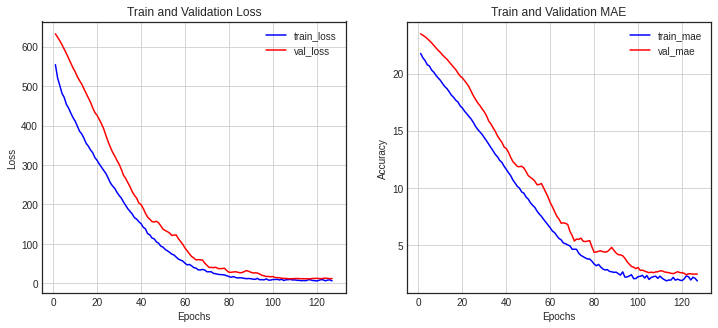

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [8]:
model.evaluate(test, test_labels) # [136.55557250976562, 10.900973320007324]

4/4 [==============================] - 0s 2ms/step - loss: 18.8992 - mae: 3.1742


[18.8991641998291, 3.174215078353882]